In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Set the style for seaborn
sns.set(style="whitegrid")

In [7]:
 #Load the data
data = pd.read_csv('../data/MachineLearningRating_v3.csv')

# Display the first few rows of the dataframe
data.head()

/tmp/ipykernel_14386/3149716167.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/MachineLearningRating_v3.csv')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [3]:
# Check the column names in the dataframe

# Descriptive statistics for numerical features
numerical_features = ['TotalPremium', 'TotalClaims'] 
descriptive_stats = data[numerical_features].describe()
descriptive_stats

,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06
mean,6.190550e+01,6.486119e+01
std,2.302845e+02,2.384075e+03
min,-7.825768e+02,-1.200241e+04
25%,0.000000e+00,0.000000e+00
50%,2.178333e+00,0.000000e+00
75%,2.192982e+01,0.000000e+00
max,6.528260e+04,3.930921e+05


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

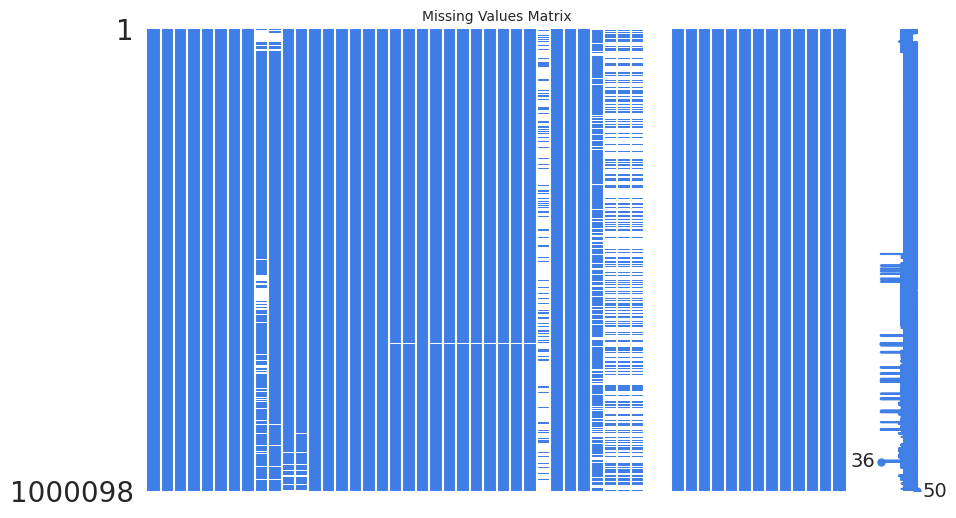

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [4]:
# Visualize missing values
msno.matrix(data, figsize=(10, 6), color=(0.25, 0.5, 0.9))
plt.title("Missing Values Matrix", fontsize=10)
plt.show()

# Count missing values per column
data.isnull().sum()

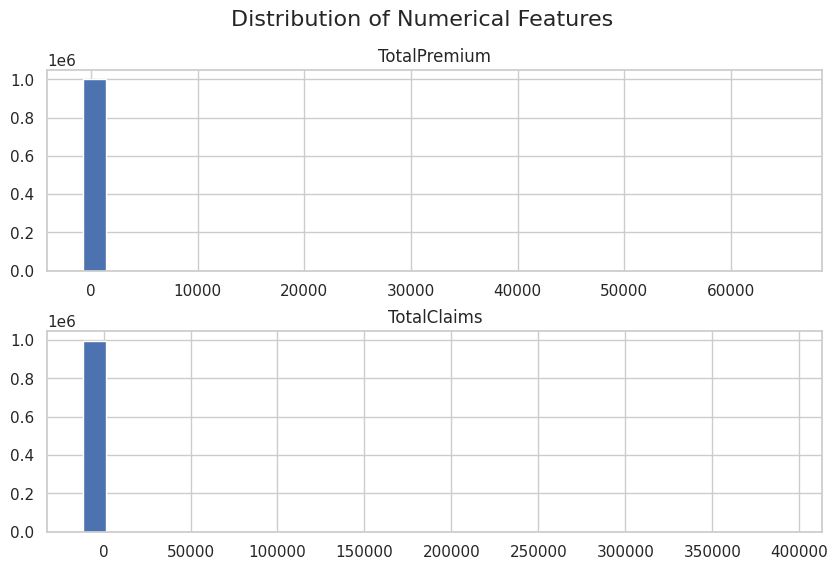

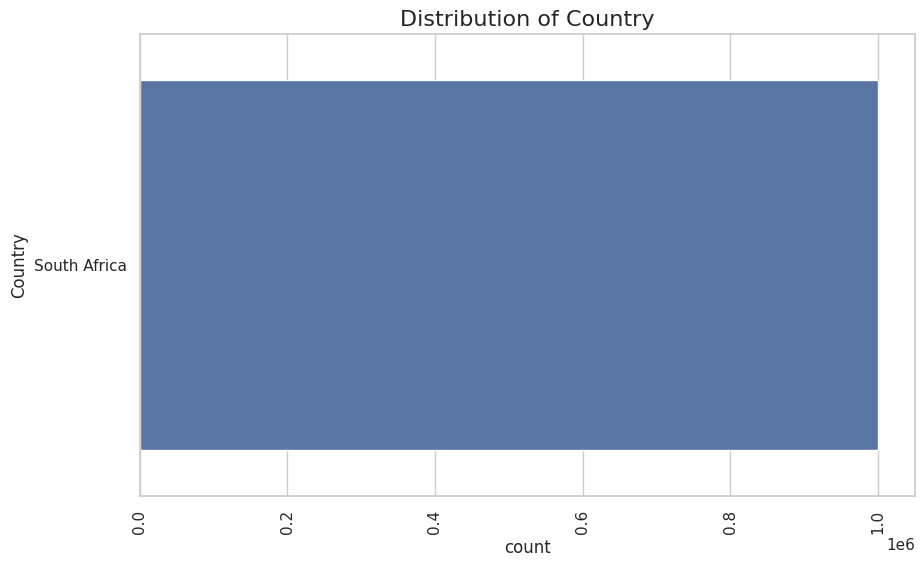

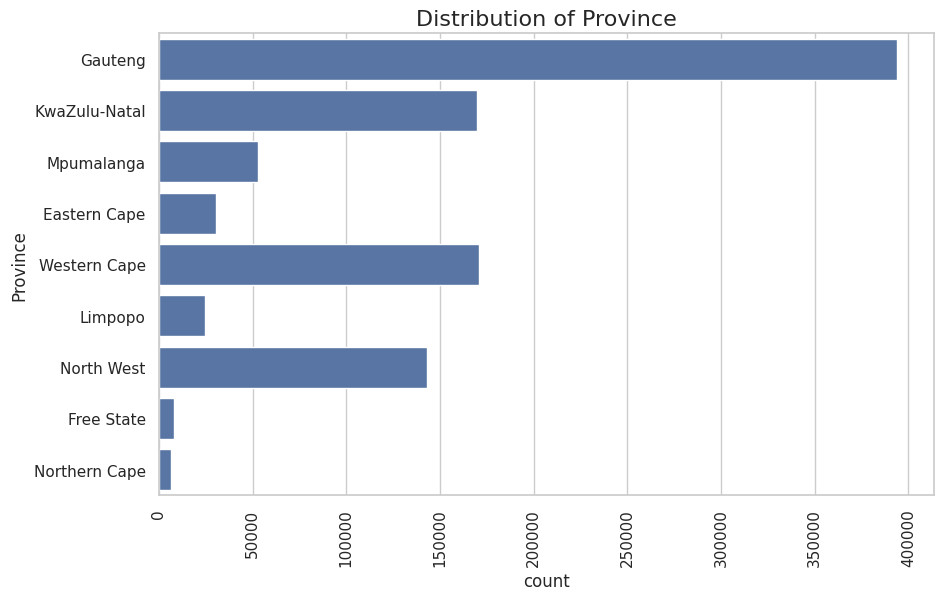

In [4]:
# Plot histograms for numerical columns
data[numerical_features].hist(bins=30, figsize=(10, 6), layout=(2, 1))
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

# Plot bar charts for categorical columns
categorical_features = ['Country','Province']  
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data[feature])
    plt.title(f"Distribution of {feature}", fontsize=16)
    plt.xticks(rotation=90)
    plt.show()

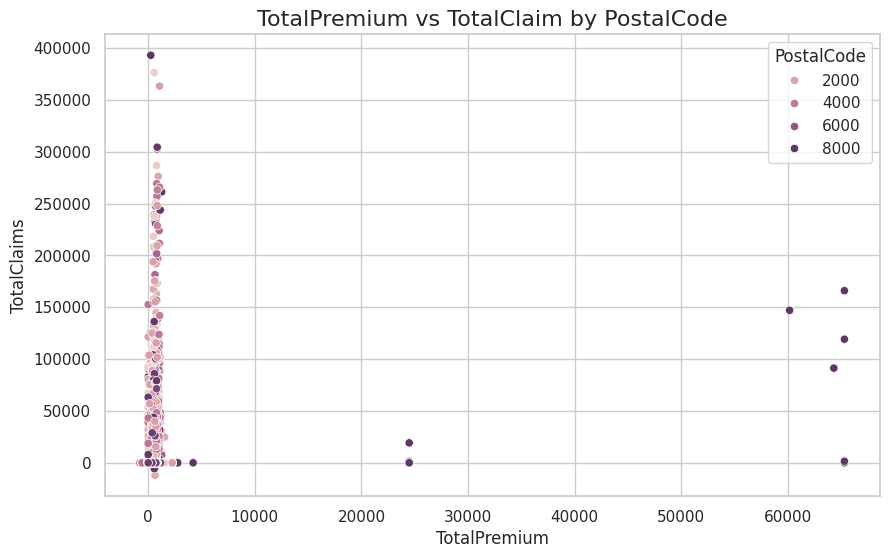

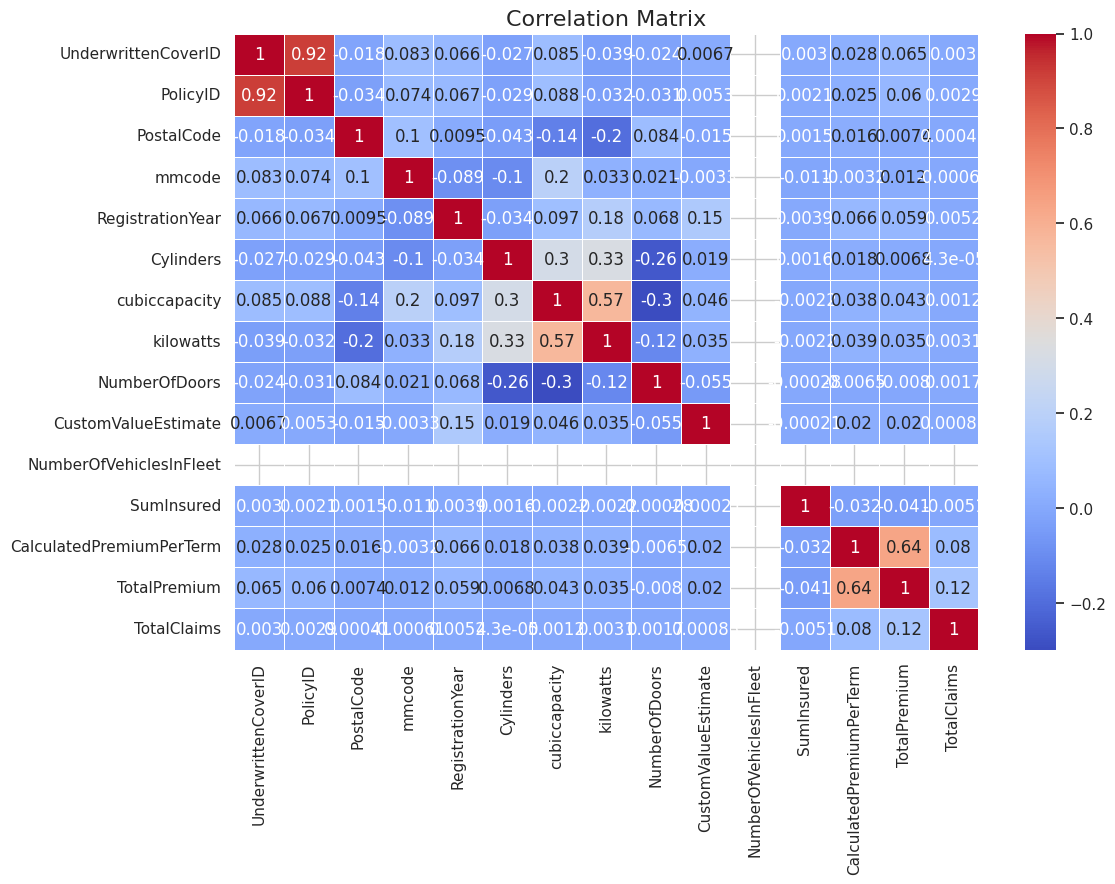

In [6]:
# Scatter plot for TotalPremium vs TotalClaim
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='PostalCode', data=data)
plt.title("TotalPremium vs TotalClaim by PostalCode", fontsize=16)
plt.show()

# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Correlation matrix
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

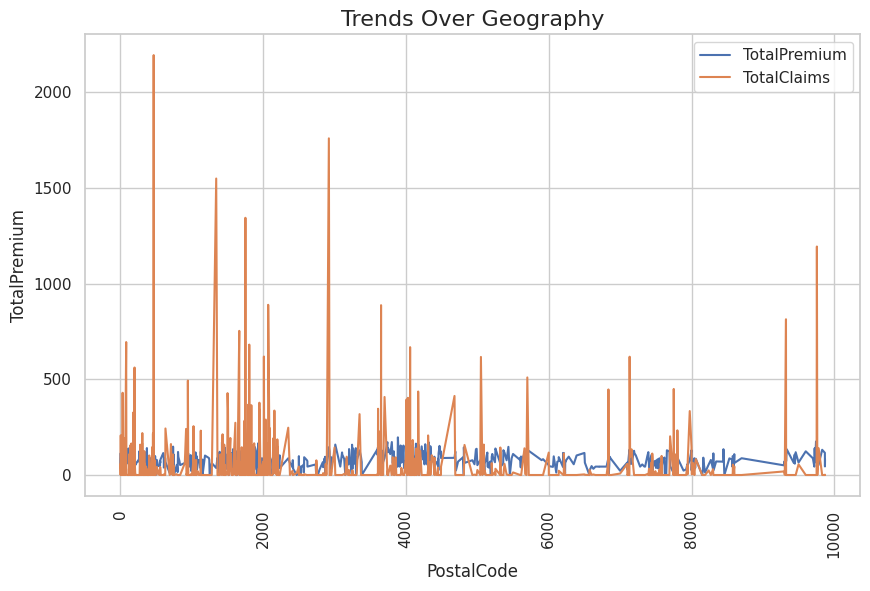

In [9]:
# Compare the change in insurance cover type, premium, auto make, etc.
# Example: Group by PostalCode and calculate mean TotalPremium and TotalClaim
zip_code_summary = data.groupby('PostalCode')[['TotalPremium', 'TotalClaims']].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='PostalCode', y='TotalPremium', data=zip_code_summary, label='TotalPremium')
sns.lineplot(x='PostalCode', y='TotalClaims', data=zip_code_summary, label='TotalClaims')
plt.title("Trends Over Geography", fontsize=16)
plt.xticks(rotation=90)
plt.legend()
plt.show()

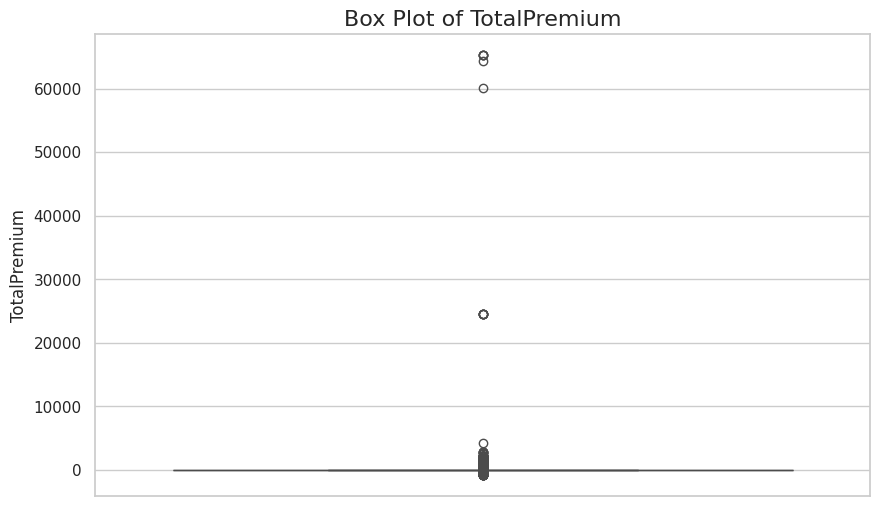

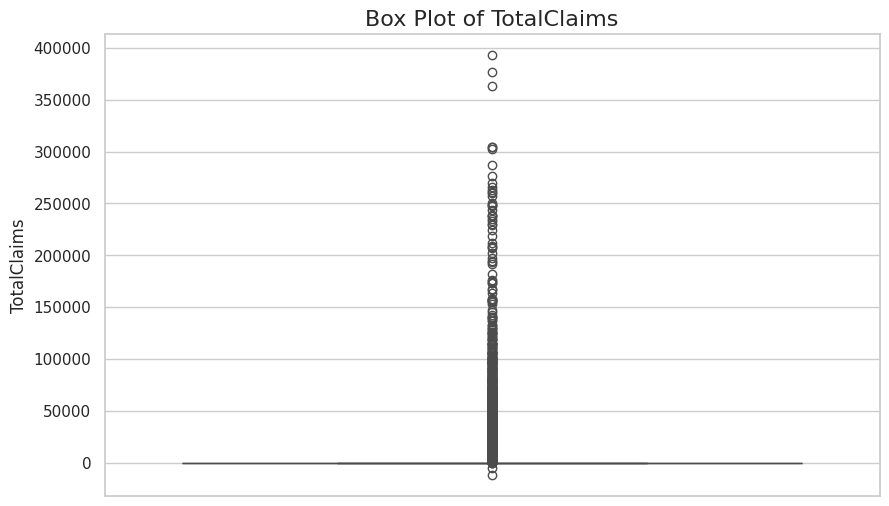

In [10]:
# Use box plots to detect outliers in numerical data
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data[feature])
    plt.title(f"Box Plot of {feature}", fontsize=16)
    plt.show()

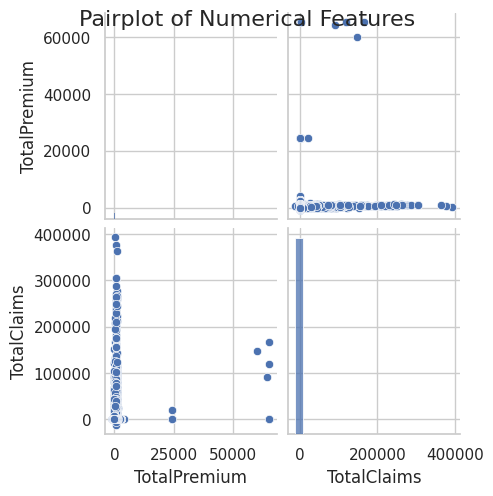

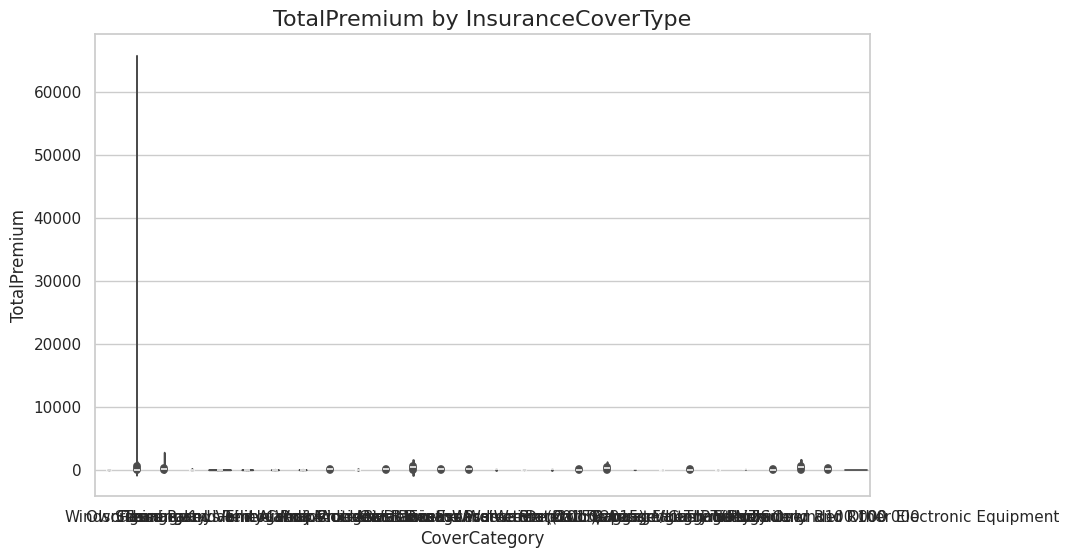

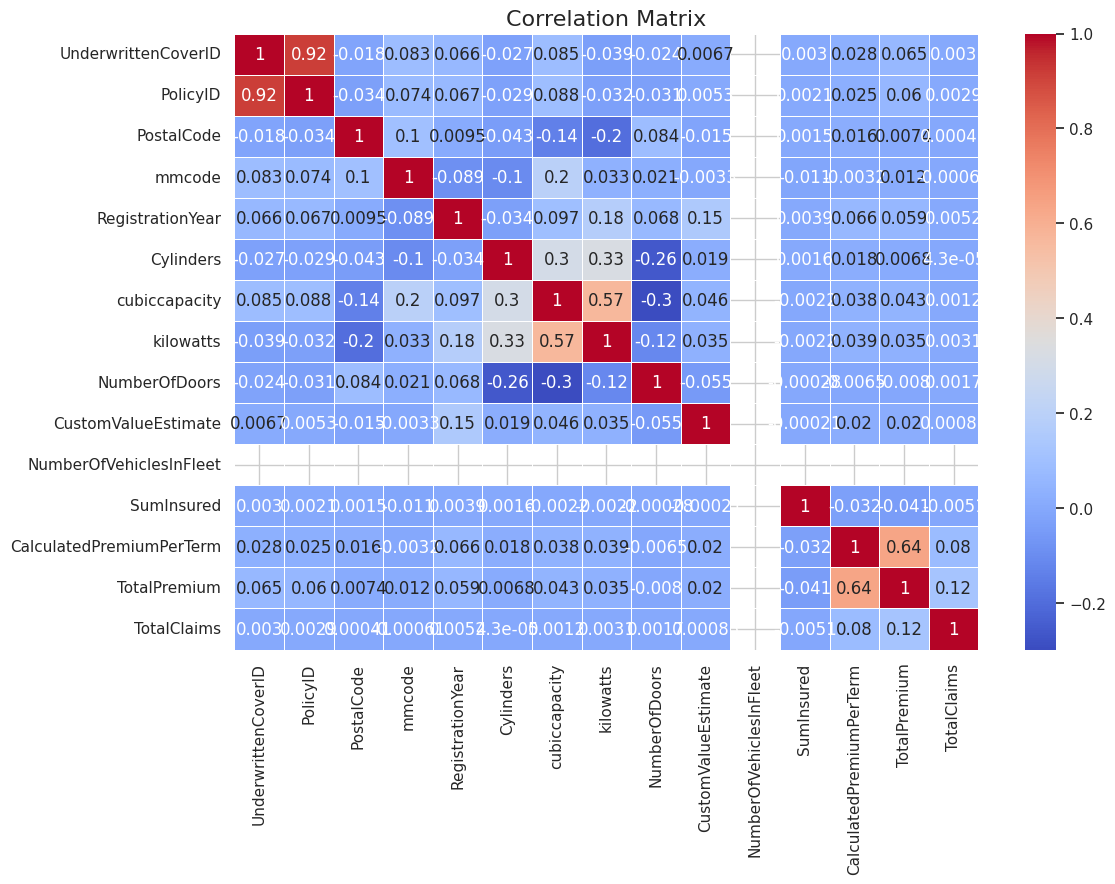

In [7]:
# Pairplot for numerical features
sns.pairplot(data[numerical_features])
plt.suptitle("Pairplot of Numerical Features", fontsize=16)
plt.show()

# Violin plot for TotalPremium by InsuranceCoverType
plt.figure(figsize=(10, 6))
sns.violinplot(x='CoverCategory', y='TotalPremium', data=data)
plt.title("TotalPremium by InsuranceCoverType", fontsize=16)
plt.show()

# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Heatmap of correlations between numerical features
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

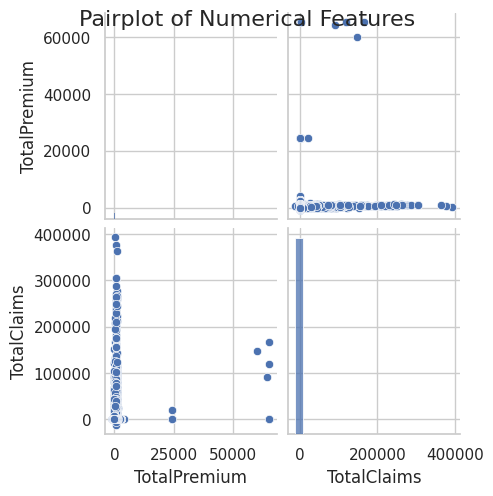

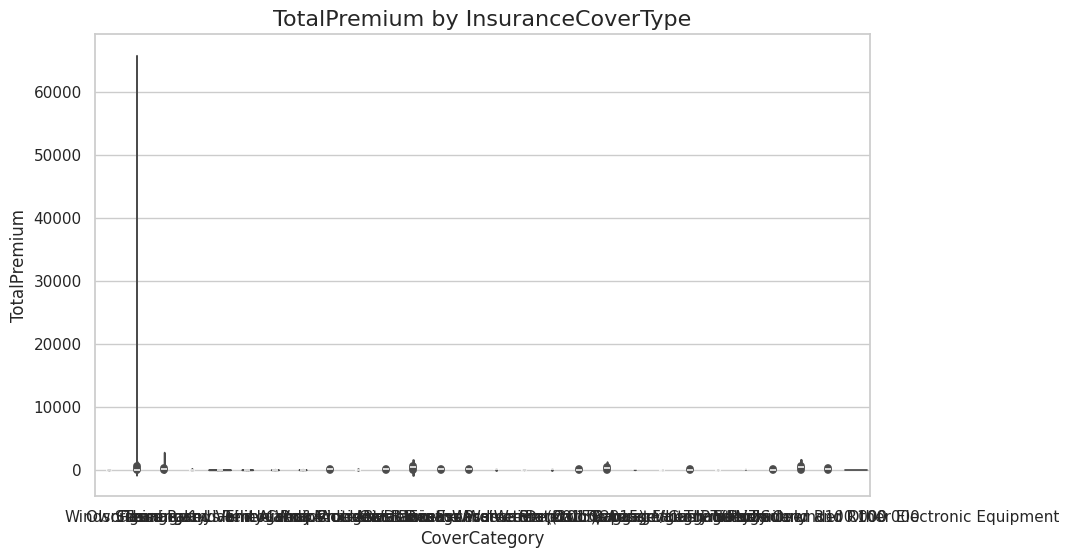

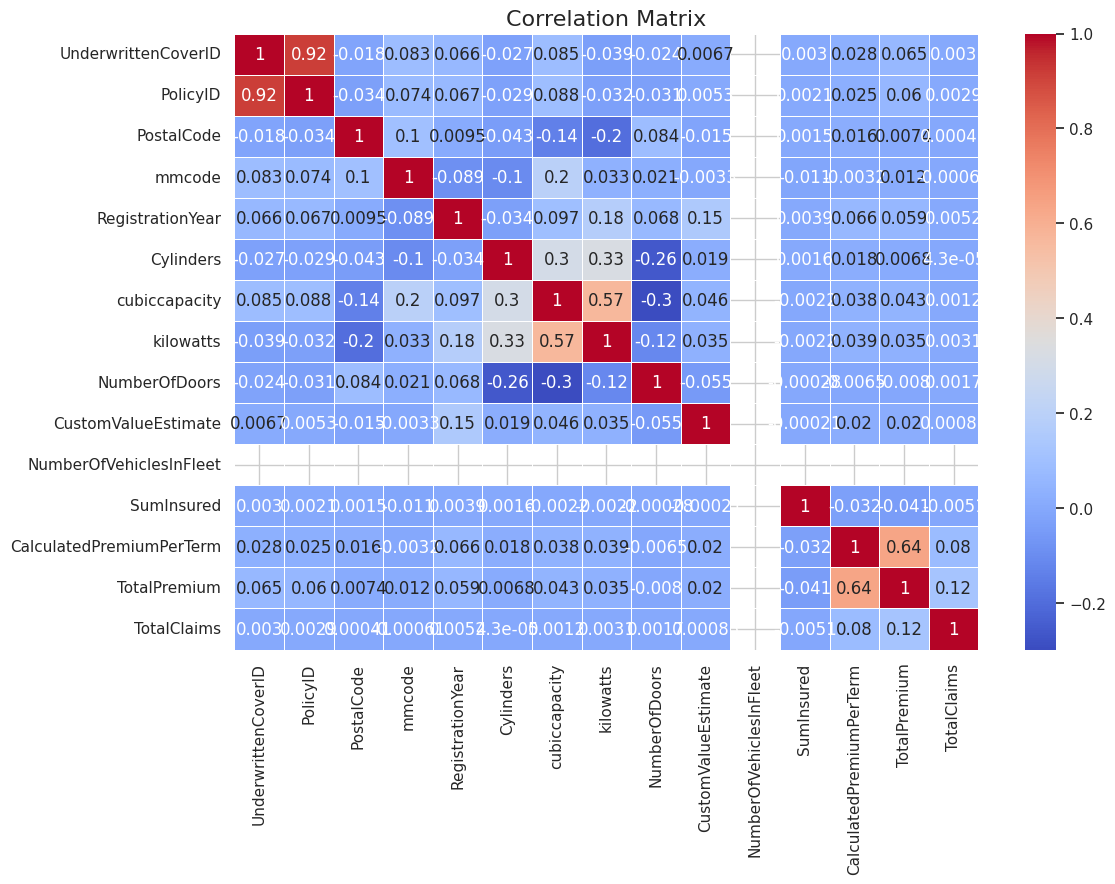

In [8]:
# Pairplot for numerical features
sns.pairplot(data[numerical_features])
plt.suptitle("Pairplot of Numerical Features", fontsize=16)
plt.show()

# Violin plot for TotalPremium by InsuranceCoverType
plt.figure(figsize=(10, 6))
sns.violinplot(x='CoverCategory', y='TotalPremium', data=data)
plt.title("TotalPremium by InsuranceCoverType", fontsize=16)
plt.show()

# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Heatmap of correlations between numerical features
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

<Figure size 1000x600 with 0 Axes>

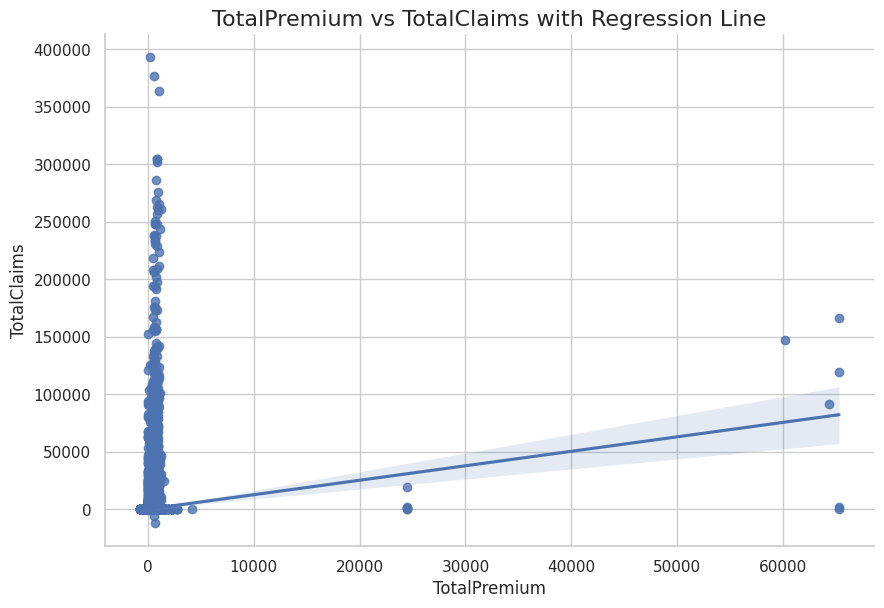

In [9]:
# Scatter plot with regression line for TotalPremium vs TotalClaim
plt.figure(figsize=(10, 6))
sns.lmplot(x='TotalPremium', y='TotalClaims', data=data, aspect=1.5, height=6)
plt.title("TotalPremium vs TotalClaims with Regression Line", fontsize=16)
plt.xlabel("TotalPremium")
plt.ylabel("TotalClaims")
plt.show()